In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'FF/train'
valid_path = 'FF/valid'
test_path = 'FF/test'

In [34]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['fru', 'flo'], batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['fru', 'flo'], batch_size=2)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['fru', 'flo'], batch_size=5)

Found 1741 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [36]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [37]:
imgs, labels = next(train_batches)

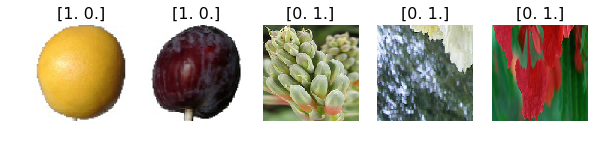

In [38]:
plots(imgs, titles=labels)

In [39]:

model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [30]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit_generator(train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor with shape[20,1577088] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_1/Adam/gradients/dense_2/MatMul_grad/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training_1/Adam/gradients/dense_2/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_1/Adam/gradients/dense_2/Softmax_grad/mul_1, dense_2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


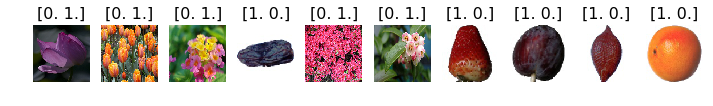

In [14]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [15]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [16]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)


In [17]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [19]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [5 0]]


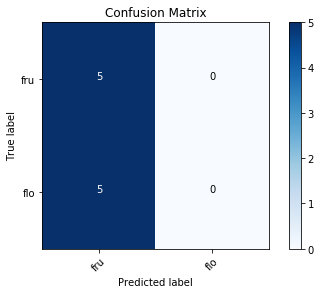

In [21]:
cm_plot_labels = ['fru','flo']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')